## SIA Sentiment Analysis: Topic Clustering Analysis

In [1]:
import pandas as pd
df1 = pd.read_csv("../data/combined_split/train_split.csv")
df2 = pd.read_csv("../data/combined_split/test_split.csv")
df3 = pd.read_csv("../data/combined_split/val_split.csv")

data = pd.concat([df1, df2, df3], ignore_index=True)
data.head()

,index,text,label
0,1218,Luggage Scam via subdivision airline I had to ...,negative
1,6783,Probably the best Airline around Have been fly...,positive
2,7890,"Singapore to Bali, Indonesia We have 4 flights...",positive
3,1363,Singapore to Denpasar on SQ948 Good to be back...,positive
4,9108,Service with a Smile Our journey started in th...,positive


In [2]:
data.head()

,index,text,label
0,1218,Luggage Scam via subdivision airline I had to ...,negative
1,6783,Probably the best Airline around Have been fly...,positive
2,7890,"Singapore to Bali, Indonesia We have 4 flights...",positive
3,1363,Singapore to Denpasar on SQ948 Good to be back...,positive
4,9108,Service with a Smile Our journey started in th...,positive


In [3]:
data["text_length"] = data["text"].apply(lambda x : len(x.split()))

In [4]:
print("The longest headline has: {} words".format(data.text_length.max()))

The longest headline has: 3219 words


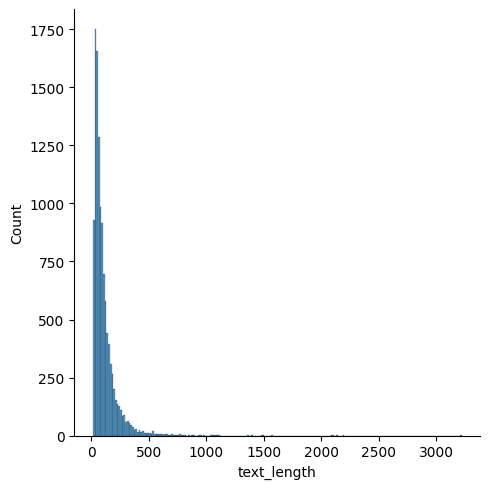

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.displot(data.text_length,kde=False)

In [6]:
import warnings
warnings.filterwarnings("ignore")

In [7]:
!pip install bertopic

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11665 entries, 0 to 11664
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   index        11665 non-null  int64 
 1   text         11665 non-null  object
 2   label        11665 non-null  object
 3   text_length  11665 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 364.7+ KB


In [ ]:
%%time
from bertopic import BERTopic
model = BERTopic(verbose=True,embedding_model='all-mpnet-base-v2', min_topic_size= 7)
topics, probs = model.fit_transform(data.text)

2025-11-09 17:01:28,608 - BERTopic - Embedding - Transforming documents to embeddings.
Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`
Batches: 100%|██████████| 365/365 [01:02<00:00,  5.85it/s]
2025-11-09 17:03:14,213 - BERTopic - Embedding - Completed ✓
2025-11-09 17:03:14,214 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-11-09 17:03:16,528 - BERTopic - Dimensionality - Completed ✓
2025-11-09 17:03:16,530 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-11-09 17:03:16,946 - BERTopic - Cluster - Completed ✓
2025-11-09 17:03:16,950 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-11-09 17:03:17,721 - BERTopic - Representation - Completed ✓


CPU times: total: 7min 10s
Wall time: 1min 49s


In [23]:
freq = model.get_topic_info()
print("Number of topics: {}".format( len(freq)))
freq.head()

Number of topics: 169


,Topic,Count,Name,Representation,Representative_Docs
0,-1,6375,-1_the_was_and_to,"[the, was, and, to, flight, singapore, in, of,...",[Our Love for Singapore airlines broken in fli...
1,0,384,0_refund_ticket_customer_cancelled,"[refund, ticket, customer, cancelled, change, ...",[SINGAPORE REFUSED I am writing this review of...
2,1,309,1_airline_best_great_excellent,"[airline, best, great, excellent, this, food, ...",[Excellent airline We have travelled before wi...
3,2,203,2_sia_is_the_always,"[sia, is, the, always, with, service, good, an...",[SIA Economy Class - Good but not special Typi...
4,3,176,3_luggage_baggage_lost_my,"[luggage, baggage, lost, my, bag, they, bags, ...",[During my Singapore Airlines flight from Kual...


In [24]:
a_topic = freq.iloc[1]["Topic"] # Select the 1st topic
model.get_topic(a_topic) # Show the words and their c-TF-IDF scores

[('refund', np.float64(0.012835685406973583)),
 ('ticket', np.float64(0.009202907463998744)),
 ('customer', np.float64(0.008389066720146459)),
 ('cancelled', np.float64(0.008158473728385863)),
 ('change', np.float64(0.008027391897940418)),
 ('they', np.float64(0.007901920170347704)),
 ('my', np.float64(0.007864718807860315)),
 ('me', np.float64(0.0076411857271331506)),
 ('to', np.float64(0.007528683155777417)),
 ('call', np.float64(0.00725883863696988))]

In [25]:
model.visualize_barchart(top_n_topics=6)

In [26]:
model.visualize_topics()

In [31]:
model.visualize_hierarchy(top_n_topics=30)